# *CLUSTERING*



---id : Unique id for each patient

age : Age of the patient in years

origin : place of study

sex : Male/Female

cp chest pain type :typical angina, atypical angina, non-anginal, asymptomatic

trestbps : resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol :serum cholesterol in mg/dl

fbs : if fasting blood sugar > 120 mg/dl

restecg(resting electrocardiographic results)Values: normal, stt abnormality, lv hypertrophy

thalach: maximum heart rate achieved

exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

lope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: normal, fixed defect, reversible defect

num: the predicted attribute



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# Load the dataset
df = pd.read_csv('heart.csv')


In [ ]:

# Remove the target column
df.drop(columns=['target'], inplace=True)


**data preparation**

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Convert scaled data to DataFrame
df = pd.DataFrame(data_scaled, columns=df.columns)

**removing outliers**

In [ ]:
Q1 = df.quantile(0.25)  # 25th percentile
Q3 = df.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Identify outliers (rows outside 1.5*IQR)
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Count of outliers per column

age           0
sex           0
cp            0
trestbps     45
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
dtype: int64


In [ ]:
from scipy.stats import zscore
import numpy as np

# Standardize the dataset (z-scores)
z_scores = np.abs(zscore(df))  # Compute Z-scores for all columns

# Identify rows with Z-scores > 3
outliers = (z_scores > 3).any(axis=1)  # Flag outliers

# Filter out rows with outliers
df = df[~outliers]

# Check the shape before and after removal
print(f"Original dataset size: 1025")
print(f"Dataset size after Z-Score filtering: {df.shape[0]}")


Original dataset size: 1025
Dataset size after Z-Score filtering: 969


In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

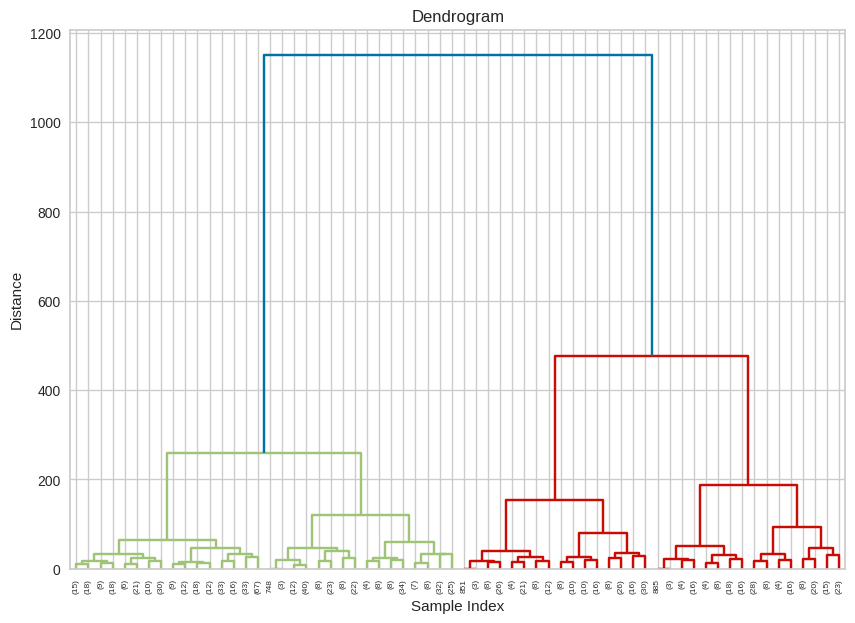

Best parameters: {'linkage': 'complete', 'metric': 'euclidean'}
Best Silhouette Score: 0.65932139836995


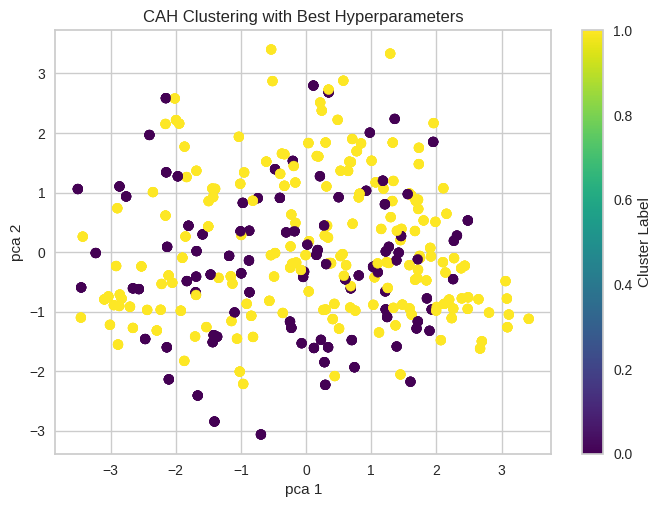

Number of clusters chosen: 2


In [ ]:
# Import necessary libraries
from sklearn.model_selection import ParameterGrid  # Import ParameterGrid
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Step 1: Optional - Plot Dendrogram for Hierarchical Visualization
def plot_dendrogram(X):
    linked = linkage(X, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode='level', p=5)
    plt.title("Dendrogram")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

plot_dendrogram(X)

# Step 2: Define Parameter Grid
param_grid = [
    {'linkage': ['ward'], 'metric': ['euclidean']},  # Ward supports only Euclidean metric
    {'linkage': ['complete', 'average', 'single'], 'metric': ['euclidean', 'manhattan', 'cosine']}
]

# Step 3: Perform Manual Grid Search for CAH
best_score = -1
best_params = None
best_labels = None

for params in ParameterGrid(param_grid):  # Ensure ParameterGrid is imported
    cah = AgglomerativeClustering(linkage=params['linkage'], metric=params['metric'])  # Use 'metric' instead of 'affinity'
    try:
        labels = cah.fit_predict(X)
        if len(set(labels)) > 1:  # Ensure at least 2 clusters
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = params
                best_labels = labels
    except ValueError as e:
        print(f"Skipping invalid configuration {params}: {e}")

print("Best parameters:", best_params)
print("Best Silhouette Score:", best_score)

if best_params is not None:
    best_cah = AgglomerativeClustering(linkage=best_params['linkage'], metric=best_params['metric'])  # Use 'metric'
    labels = best_cah.fit_predict(X)
    df['CAH_Cluster'] = labels  # Assign cluster labels to 'CAH_Cluster' column


    # Step 5: Visualize Clusters
    # Assuming 'pca_result' is a 2D array from a prior PCA step
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', s=50)
    plt.title("CAH Clustering with Best Hyperparameters")
    plt.xlabel("pca 1")
    plt.ylabel("pca 2")
    plt.colorbar(label='Cluster Label')
    plt.show()

    # Step 6: Calculate and Print the Number of Clusters Chosen
    num_clusters = len(set(best_labels))
    print("Number of clusters chosen:", num_clusters)
else:
    print("No valid clustering configuration was found.")


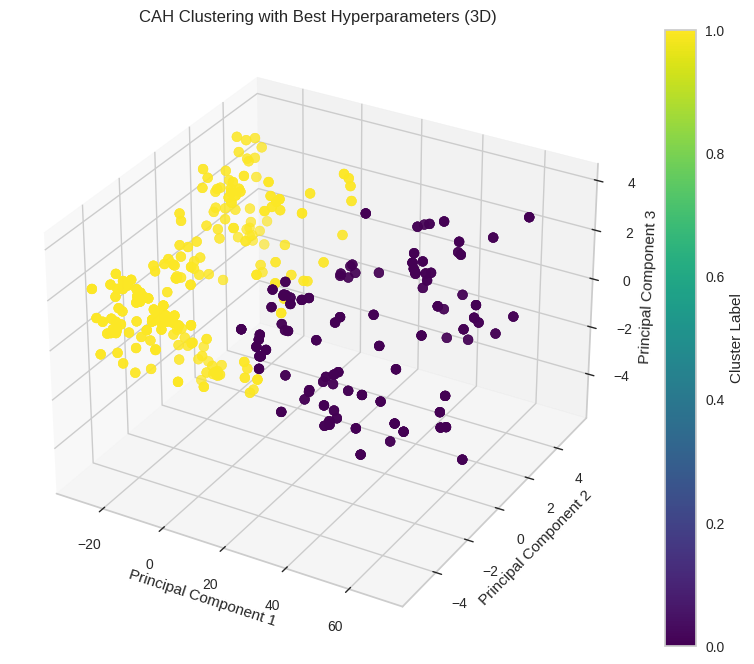

Number of clusters chosen: 2


In [ ]:

    # Step 5: Visualize Clusters in 3D
    # Reduce the dimensionality of the features to 3D using PCA for visualization
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)

    # Plot the clusters based on the first three principal components
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', s=50)

    ax.set_title("CAH Clustering with Best Hyperparameters (3D)")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    fig.colorbar(scatter, label='Cluster Label')
    plt.show()

    # Step 6: Calculate and Print the Number of Clusters Chosen
    num_clusters = len(set(labels))  # Use `labels` from the clustering result
    print("Number of clusters chosen:", num_clusters)


In [ ]:

print("CAH Silhouette Score:", silhouette_score(df, df['CAH_Cluster']))

K-means Silhouette Score: 0.263380142422008
DBSCAN Silhouette Score: 0.4840805024093966
CAH Silhouette Score: 0.6594254928574633


# ***CONCLUSION***

# **Interpretation:**


*   Cluster 0 represents a group of older individuals, more likely to have males, experience less severe chest pain, and report more cases of exercise-induced angina and abnormal thalassemia results. These individuals may have more chronic or longstanding heart conditions, as indicated by higher ST depression (oldpeak).

.
*   Cluster 1 represents a younger, more balanced gender group with more severe chest pain, fewer cases of exercise-induced angina, and fewer abnormal thalassemia results. This cluster may be associated with more acute or potentially reversible cardiovascular issues.




